In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

**Loading Data**

In [26]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [27]:
print(f"shape of x_train:{x_train.shape}")
print(f"shape of y_train:{y_train.shape}")
print(f"shape of x_test:{x_test.shape}")
print(f"shape of y_test:{y_test.shape}")


shape of x_train:(50000, 32, 32, 3)
shape of y_train:(50000, 1)
shape of x_test:(10000, 32, 32, 3)
shape of y_test:(10000, 1)


In [28]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [29]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

**Visualizing train data**

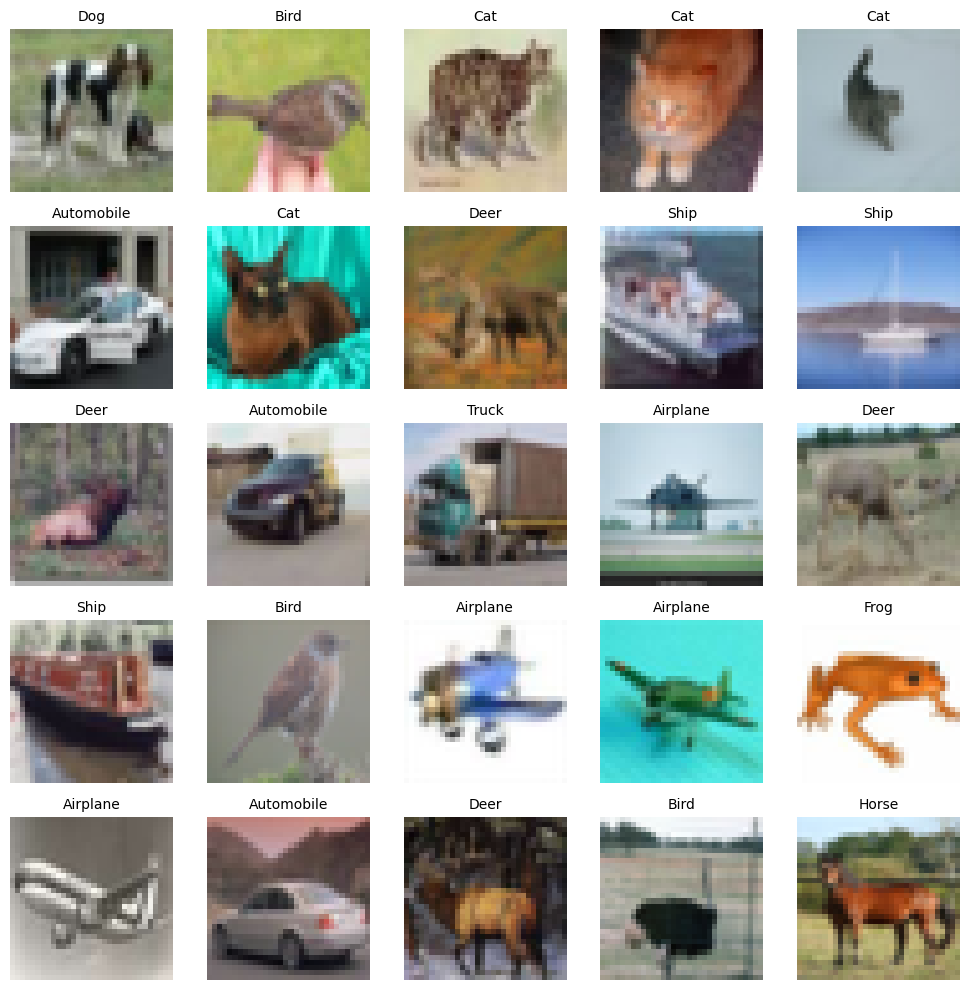

In [30]:
def visualize_cifar10(data, labels, classes, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        idx = np.random.randint(0, data.shape[0])  
        plt.subplot(5, 5, i + 1)
        plt.imshow(data[idx])
        plt.title(classes[labels[idx][0]], fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_cifar10(x_train, y_train, classes)

# Normalization

In [31]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# One hot encoding

In [32]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Normalized training data shape: {x_train.shape}")
print(f"One-hot encoded labels shape: {y_train.shape}")

Normalized training data shape: (50000, 32, 32, 3)
One-hot encoded labels shape: (50000, 10)


 # CNN model build


In [33]:
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Training model

In [34]:
#CNN
cnn_model = build_cnn_model()
cnn_history = cnn_model.fit(
    x_train, y_train,
    epochs=10, 
    batch_size=64,
    validation_data=(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3368 - loss: 1.7883 - val_accuracy: 0.5487 - val_loss: 1.2594
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5690 - loss: 1.2214 - val_accuracy: 0.5926 - val_loss: 1.1447
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6327 - loss: 1.0451 - val_accuracy: 0.6188 - val_loss: 1.0977
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6770 - loss: 0.9379 - val_accuracy: 0.6564 - val_loss: 0.9753
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7069 - loss: 0.8433 - val_accuracy: 0.6861 - val_loss: 0.9222
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7288 - loss: 0.7809 - val_accuracy: 0.6838 - val_loss: 0.9112
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7477 - loss: 0.7222 - val_accuracy: 0.7138 - val_loss: 0.8346
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7637 - loss: 0.6718 - val_accuracy: 0.

# Evaluation

In [35]:
#cnn evaluation
cnn_eval = cnn_model.evaluate(x_test, y_test)
print(f"CNN - Test Loss: {cnn_eval[0]}, Test Accuracy: {cnn_eval[1]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7211 - loss: 0.8319
CNN - Test Loss: 0.8400880098342896, Test Accuracy: 0.7208999991416931


# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


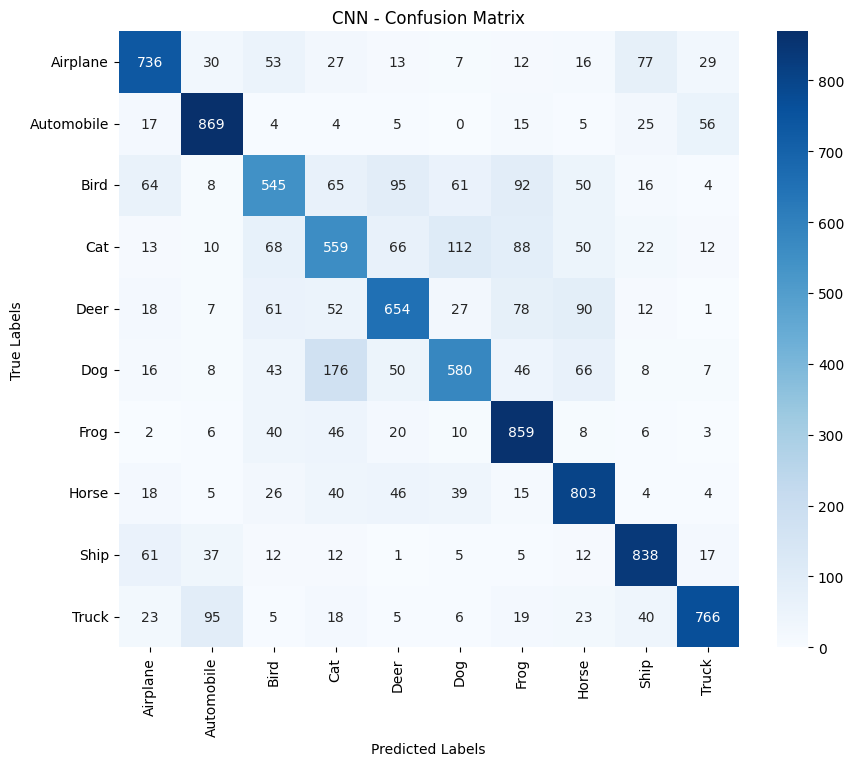

In [36]:
from sklearn.metrics import confusion_matrix

cnn_predictions = np.argmax(cnn_model.predict(x_test), axis=1)
y_test_flat = np.argmax(y_test, axis=1)  # flattening one-hot encoded labels
cnn_conf_matrix = confusion_matrix(y_test_flat, cnn_predictions)


plt.figure(figsize=(10, 8))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('CNN - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Classification Report

In [37]:
from sklearn.metrics import classification_report

print("CNN - Classification Report:\n")
print(classification_report(y_test_flat, cnn_predictions, target_names=classes))

CNN - Classification Report:

              precision    recall  f1-score   support

    Airplane       0.76      0.74      0.75      1000
  Automobile       0.81      0.87      0.84      1000
        Bird       0.64      0.55      0.59      1000
         Cat       0.56      0.56      0.56      1000
        Deer       0.68      0.65      0.67      1000
         Dog       0.68      0.58      0.63      1000
        Frog       0.70      0.86      0.77      1000
       Horse       0.72      0.80      0.76      1000
        Ship       0.80      0.84      0.82      1000
       Truck       0.85      0.77      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



# Accuracy graph

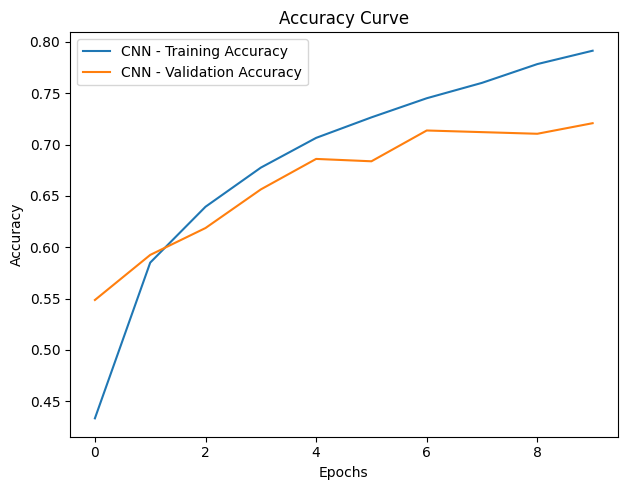

In [38]:
plt.figure(figsize=(12, 5))

# CNN
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN - Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN - Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Loss graph

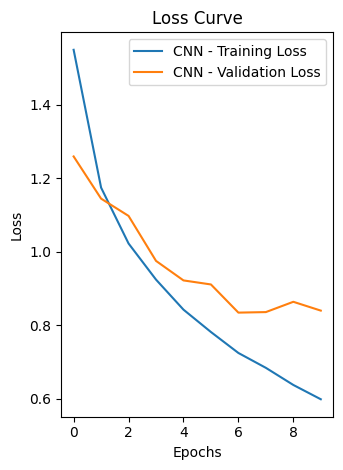

In [39]:
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CNN - Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN - Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualizing predictions

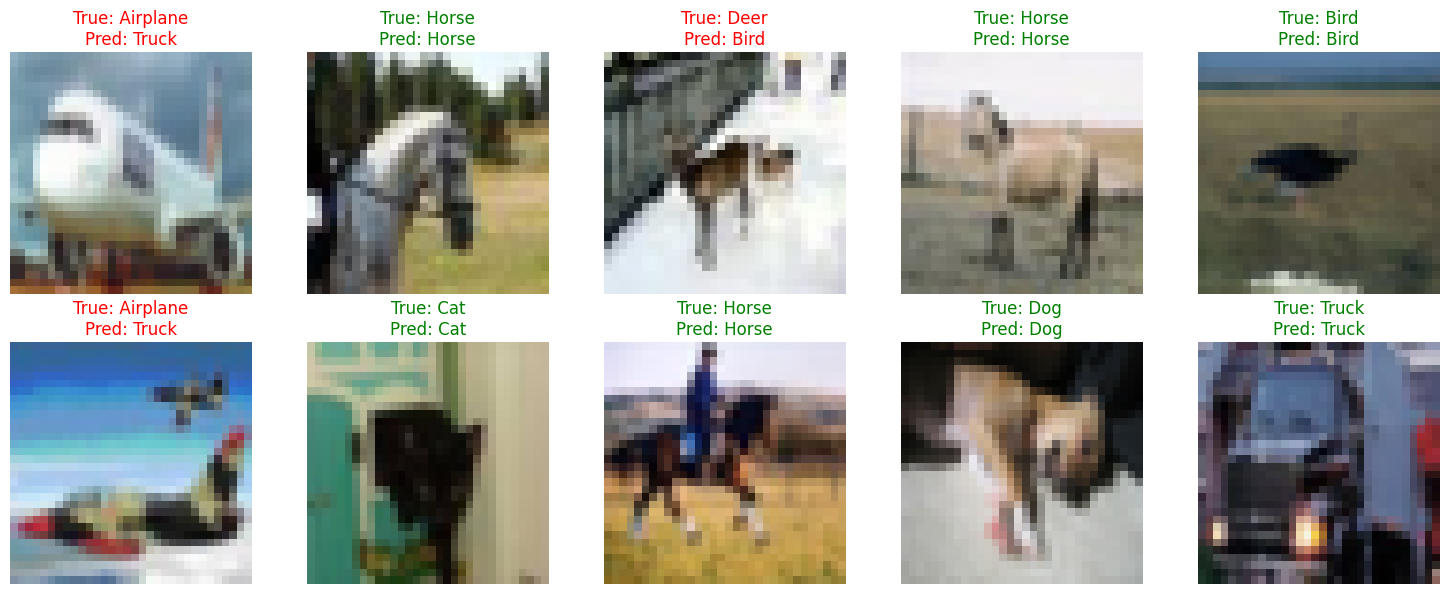

In [40]:
num_images = 10
random_indices = np.random.choice(len(x_test), num_images, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx])
    true_label = classes[y_test_flat[idx]]
    pred_label = classes[cnn_predictions[idx]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()
